<a href="https://colab.research.google.com/github/Nguyencongdat1997/A.n.D/blob/master/Try3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [1]:
import numpy as np
import time

# Data

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


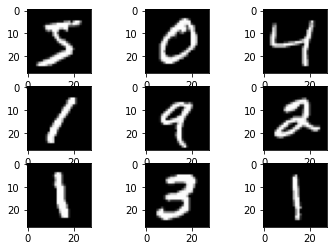

In [19]:
# example of loading the mnist dataset
from keras.datasets import mnist
from matplotlib import pyplot

# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [20]:
# one-hot encoding
num_classes = np.max(trainy) + 1
trainy = np.eye(num_classes)[trainy] 
testy = np.eye(num_classes)[testy] 

print(trainX.shape, testX.shape)
# TODO: shufle dataset if necessary
X_train = np.float32(trainX)
Y_train = trainy
X_test = np.float32(testX)
Y_test = testy
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28) (10000, 28, 28)


# Model

In [7]:
def sigmoid(z):
    s = 1. / (1. + np.exp(-z))
    return s

In [8]:
def feed_forward(X, params):
    cache = {}

    # flatten the image
    a0 = X.reshape((X.shape[0], 784, 1))

    # Z1 = W1.dot(x) + b1
    # print("ao", a0.shape) #(64, 784, 1)
    # print("W1", params["W1"].shape) #(128, 784)
    cache["Z1"] = np.matmul(params["W1"], a0) + params["b1"]
    # print("Z1 ", cache["Z1"].shape) #(64, 128, 1)
    # A1 = sigmoid(Z1)
    cache["A1"] = sigmoid(cache["Z1"])

    # Z2 = W2.dot(A1) + b2
    cache["Z2"] = np.matmul(params["W2"], cache["A1"]) + params["b2"]

    # A2 = softmax(Z2)
    cache["A2"] = np.exp(cache["Z2"]) / np.sum(np.exp(cache["Z2"]), axis=0)

    return cache

In [14]:
a = np.array([[2,2],[3,3],[4,4]] )
print(a.shape)
b = np.array([1,1])
print(b.shape)
print(np.dot(a,b))
print(np.matmul(a,b))
a = a.reshape(3,2,1)
print(a)
print(np.matmul(b.T,a))
print(np.dot(b.T,a))

(3, 2)
(2,)
[4 6 8]
[4 6 8]
[[[2]
  [2]]

 [[3]
  [3]]

 [[4]
  [4]]]
[[4]
 [6]
 [8]]
[[4]
 [6]
 [8]]


In [9]:
def back_propagate(X, Y, params, cache, m_batch):
    # error at last layer
    y = Y.reshape(cache["A2"].shape)
    a0 = X.reshape((X.shape[0], 784, 1))

    dZ2 = cache["A2"] - y
    
    # print("A2 ", cache["A2"].shape)
    # print("dZ2 ", dZ2.shape)
    # # gradients at last layer (Py2 need 1. to transform to float)
    # dW = np.dot(dZ, cache[0].T) / batch_size
    #     db = np.squeeze(np.sum(dZ, axis=1, keepdims=True)) / batch_size
    #     dA_prev = np.dot(cache[1].T, dZ)

    #dW2 = (1. / m_batch) * np.matmul(dZ2, cache["A1"].T)
    dW2 = (1. / m_batch) * np.sum(np.matmul(dZ2, np.transpose(cache["A1"],(0,2,1))), axis=0)
    db2 = (1. / m_batch) * np.sum(dZ2, axis=0)
    # print("dW2 ", dW2.shape)
    # print("db2 ", db2.shape)

    # back propgate through first layer
    #dA1 = np.matmul(params["W2"].T, dZ2)
    dA1 = np.matmul(params["W2"].T, dZ2)
    dZ1 = dA1 * sigmoid(cache["Z1"]) * (1 - sigmoid(cache["Z1"]))
    # gradients at first layer (Py2 need 1. to transform to float)
    #dW1 = (1. / m_batch) * np.matmul(dZ1, a0.T)
    dW1 = (1. / m_batch) * np.sum(np.matmul(dZ1, np.transpose(a0,(0,2,1))), axis=0)
    db1 = (1. / m_batch) * np.sum(dZ1, axis=0)

    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
    # print("--------------")
    return grads

In [13]:
def mini_batch_gradient(dZ_batch, A_prev_batch):
    batch_size = dZ_batch.shape[0]
    w_grad_list = []
    b_grad_list = []
    batch_loss = 0
    for i in range(batch_size):
        dZ, A_prev= dZ_batch[i], A_prev_batch[i]
        dWi = np.dot(dZ, A_prev.T)
        w_grad_list.append(dWi)

    dW = sum(w_grad_list)/batch_size
    db = (1. / m_batch) * np.sum(dZ_batch, axis=0)
    return dW, db

def back_propagate(X, Y, params, cache, m_batch):
    # error at last layer
    y = Y.reshape(cache["A2"].shape)
    a0 = X.reshape((X.shape[0], 784, 1))

    dZ2 = cache["A2"] - y
    dW2, db2 = mini_batch_gradient(dZ2, cache["A1"])

    # back propgate through first layer
    #dA1 = np.matmul(params["W2"].T, dZ2)
    dA1 = np.matmul(params["W2"].T, dZ2)
    dZ1 = dA1 * sigmoid(cache["Z1"]) * (1 - sigmoid(cache["Z1"]))
    dW1, db1 = mini_batch_gradient(dZ1, a0)

    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
    # print("--------------")
    return grads

In [10]:
def update_weights(params, grads, lr):
    # with momentum (optional)
    # dW1 = (beta * dW1 + (1. - beta) * grads["dW1"])
    # db1 = (beta * db1 + (1. - beta) * grads["db1"])
    # dW2 = (beta * dW2 + (1. - beta) * grads["dW2"])
    # db2 = (beta * db2 + (1. - beta) * grads["db2"])
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]

    # gradient descent
    params["W1"] = params["W1"] - lr * dW1
    params["b1"] = params["b1"] - lr * db1
    params["W2"] = params["W2"] - lr * dW2
    params["b2"] = params["b2"] - lr * db2

    return params

In [11]:
def compute_loss(Y, Y_hat):
    
    y_hat = Y_hat.reshape((Y_hat.shape[0], Y_hat.shape[1]))
    #L_sum = np.sum(np.multiply(Y, np.log(y_hat)))
    m = Y.shape[0]
    L = -(1./m) * np.sum(Y * np.log(y_hat)) / y_hat.shape[0] # L_sum

    return L

def compute_accuracy(Y, Y_hat):
    y_hat = Y_hat.reshape((Y_hat.shape[0], Y_hat.shape[1]))
    predictions = [] 
    for i in range(len(Y)):
        pred = np.argmax(y_hat[i]) 
        predictions.append(pred == np.argmax(Y[i])) 
    return np.mean(predictions)

# Weight Initialization

In [42]:
n_x=784
n_h=128
epochs=4 
lr=0.01
batch_size=500
beta=0.9 
digits=10

params = {"W1": np.random.randn(n_h, n_x) * np.sqrt(1. / n_x),
          "b1": np.zeros((n_h, 1)) * np.sqrt(1. / n_x),
          "W2": np.random.randn(digits, n_h) * np.sqrt(1. / n_h),
          "b2": np.zeros((digits, 1)) * np.sqrt(1. / n_h)}


# Trainer

In [44]:
start_time = time.time()
for i in range(epochs): #360s/4ep - 4ep75% - 
    learning_rate = lr*0.9**i
    # shuffle training set
    # permutation = np.random.permutation(X_train.shape[1])
    # X_train_shuffled = X_train[:, permutation]
    # Y_train_shuffled = Y_train[:, permutation]
    X_train_shuffled = X_train
    Y_train_shuffled = Y_train

    mini_batches= int(X_train.shape[0]/batch_size)
    for j in range(mini_batches):
        learning_rate = max(learning_rate*0.99, 0.00075)
        start = int(len(X_train_shuffled) * j / mini_batches)
        stop = int(len(X_train_shuffled) * (j + 1) / mini_batches)
        X = X_train_shuffled[start:stop]; Y = Y_train_shuffled[start:stop]
        m_batch = stop - start

        # forward and backward

        cache = feed_forward(X, params)

        grads = back_propagate(X, Y, params, cache, m_batch)
        #print(grads)
        params = update_weights(params, grads, learning_rate)

        train_acc = compute_accuracy(Y, cache["A2"])
        cache2 = feed_forward(X_test, params)
        test_acc = compute_accuracy(Y_test, cache2["A2"])
        print('Train Accuracy: {0:.2f}%. Test Accuracy: {1:.2f}%. LR: {2}'.format(train_acc * 100, test_acc * 100, learning_rate))

    # forward pass on training set
    cache = feed_forward(X_train, params)
    train_loss = compute_loss(Y_train, cache["A2"])

    # forward pass on test set
    cache = feed_forward(X_test, params)
    test_loss = compute_loss(Y_test, cache["A2"])
    print("Epoch {}: training loss = {}, test loss = {}".format(
        i + 1, train_loss, test_loss))
    test_acc = compute_accuracy(Y_test, cache["A2"])
    print('Epoch: {0}, Time Spent: {1:.2f}s, Accuracy: {2:.2f}%'.format(
            i+1, time.time() - start_time, test_acc * 100))

Train Accuracy: 77.60%. Test Accuracy: 74.72%. LR: 0.0099
Train Accuracy: 71.60%. Test Accuracy: 74.82%. LR: 0.009801
Train Accuracy: 69.60%. Test Accuracy: 74.80%. LR: 0.00970299
Train Accuracy: 75.80%. Test Accuracy: 74.88%. LR: 0.0096059601
Train Accuracy: 77.60%. Test Accuracy: 75.23%. LR: 0.009509900499
Train Accuracy: 80.00%. Test Accuracy: 74.84%. LR: 0.00941480149401
Train Accuracy: 77.00%. Test Accuracy: 74.80%. LR: 0.0093206534790699
Train Accuracy: 76.00%. Test Accuracy: 74.93%. LR: 0.0092274469442792
Train Accuracy: 77.40%. Test Accuracy: 74.44%. LR: 0.009135172474836408
Train Accuracy: 77.20%. Test Accuracy: 74.43%. LR: 0.009043820750088045
Train Accuracy: 75.20%. Test Accuracy: 74.37%. LR: 0.008953382542587164
Train Accuracy: 74.40%. Test Accuracy: 74.37%. LR: 0.008863848717161293
Train Accuracy: 76.40%. Test Accuracy: 74.56%. LR: 0.00877521022998968
Train Accuracy: 75.40%. Test Accuracy: 74.50%. LR: 0.008687458127689783
Train Accuracy: 72.80%. Test Accuracy: 74.58%. LR: 

KeyboardInterrupt: ignored

In [91]:
t= np.array([[[0,1], [2,3]], [[4,5], [6,7]]])
print(t.shape)
print("")
print(t)
print("")
print(np.transpose(t[0]))
print(np.transpose(t[1]))
print("")
print(np.transpose(t,(0,2,1)))

(2, 2, 2)

[[[0 1]
  [2 3]]

 [[4 5]
  [6 7]]]

[[0 2]
 [1 3]]
[[4 6]
 [5 7]]

[[[0 2]
  [1 3]]

 [[4 6]
  [5 7]]]
